#  Principal Component Analysis

---



Hasta ahora, hemos estado analizando en profundidad los estimadores de aprendizaje supervisado: aquellos estimadores que predicen etiquetas basadas en datos de entrenamiento etiquetados.
Aquí comenzamos a observar varios estimadores no supervisados, que pueden resaltar aspectos interesantes de los datos sin hacer referencia a etiquetas conocidas.

En esta sección, exploramos lo que es quizás uno de los algoritmos no supervisados ​​más utilizados, el análisis de componentes principales (PCA).
PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta para visualización, filtrado de ruido, extracción e ingeniería de características, y mucho más.
Después de una breve discusión conceptual del algoritmo PCA, veremos un par de ejemplos de estas aplicaciones adicionales.

Comenzamos con importando las librerías tradicionales:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introduciendo Principal Component Analysis (PCA)

El PCA es un método rápido y flexible no supervisado para la reducción de la dimensionalidad de los datos.

Su comportamiento es más fácil de visualizar al observar un conjunto de datos bidimensionales.

Considere los siguientes 200 puntos:

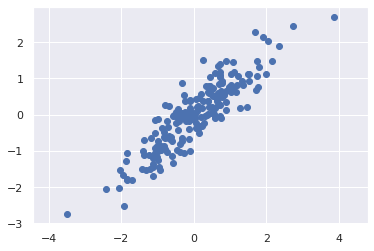

In [2]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, está claro que existe una relación casi lineal entre las variables X e Y.

Esto se parece a la regresión lineal que exploramos en clases anteriores, pero la configuración del problema aquí es ligeramente diferente: en lugar de intentar *predecir* los valores de Y a partir de los valores de X, el problema de aprendizaje no supervisado intenta aprender sobre la *relación* entre los valores de X e Y.

En el análisis de componentes principales, esta relación se cuantifica al encontrar una lista de los *ejes principales* en los datos y usar esos ejes para describir el conjunto de datos.

Usando el estimador `` PCA '' de Scikit-Learn, podemos calcular esto de la siguiente manera:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

El ajuste aprende algunas cantidades de los datos, lo más importante, los "componentes" y la "variabilidad explicada":

In [4]:
print(pca.transform(X))

[[-1.74205358e+00  2.17646491e-01]
 [-1.25509936e+00  1.33469853e-01]
 [ 1.74629142e+00  3.87214715e-01]
 [ 1.12132413e+00  1.49381180e-01]
 [ 1.72563526e-01 -2.13612419e-01]
 [ 4.64505232e+00 -5.55606614e-01]
 [ 2.39038417e-01 -2.22523868e-01]
 [ 8.62401300e-01 -3.31274653e-01]
 [ 1.20502441e+00 -8.89782848e-02]
 [-7.85583098e-01 -6.63136462e-01]
 [-1.71105636e+00 -4.22886465e-01]
 [ 3.71307142e-01 -2.87515960e-01]
 [-1.67060192e+00 -1.26479348e-01]
 [-5.77783543e-02  1.60131131e-01]
 [-1.27184996e+00 -1.50759324e-01]
 [-1.03124695e+00 -4.07214117e-01]
 [ 3.65137670e+00  9.48098048e-03]
 [-2.27763891e+00  3.13806614e-01]
 [ 7.74618678e-01 -8.88922519e-02]
 [-2.91684834e+00 -8.65375262e-02]
 [-9.77641394e-01 -4.66837920e-02]
 [ 1.25376233e+00 -1.53236442e-01]
 [-8.49994193e-01 -3.27211573e-01]
 [-9.41543894e-01  3.39097147e-01]
 [-1.29028699e+00 -1.66034090e-02]
 [ 4.91299033e-01 -1.92967253e-01]
 [-1.30778316e+00 -1.40337212e-02]
 [ 1.62550484e+00  5.24441781e-01]
 [ 3.08586875e-03  9

In [6]:
import pandas as pd
df=pd.DataFrame(X)
df.corr()

,0,1
0,1.000000,0.892929
1,0.892929,1.000000


In [10]:
df_trans =  pd.DataFrame(pca.transform(X))
df_trans.corr()


,0,1
0,1.000000e+00,-1.198438e-16
1,-1.198438e-16,1.000000e+00


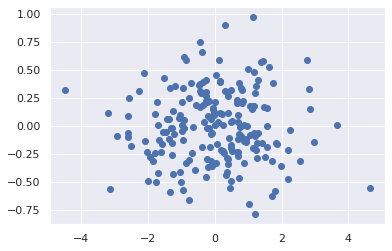

In [11]:
plt.scatter(df_trans[0],df_trans[1])

In [ ]:
print(pca.components_)

[[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]


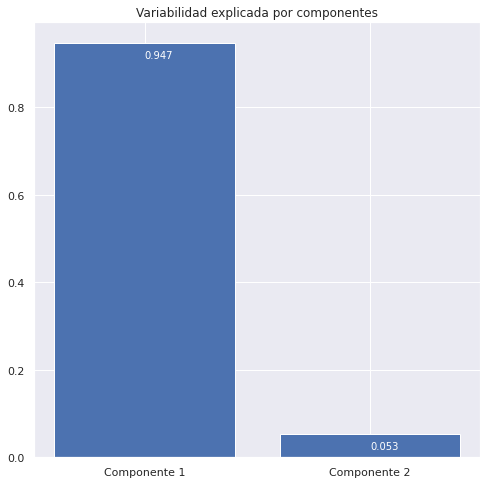

In [8]:
# Grafiquemos la variabilidad explicada por los componentes
fig, ax = plt.subplots(figsize=(8,8))

# Grafico de barras
ax.bar(x = ['Componente 1', 'Componente 2'], height = pca.explained_variance_ratio_)

# Agregamos labels
ax.annotate(s = np.round(pca.explained_variance_ratio_[0], 3), xy=(0,np.round(pca.explained_variance_ratio_[0], 3)-.035), color='white')
ax.annotate(s = np.round(pca.explained_variance_ratio_[1], 3), xy=(1,np.round(pca.explained_variance_ratio_[1], 3)-.035), color='white')

# Agregamos el título
ax.set_title('Variabilidad explicada por componentes')

# Mostramos la gráfica
plt.show()

Para ver qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector y la "variabilidad explicada" para definir la longitud al cuadrado del vector:

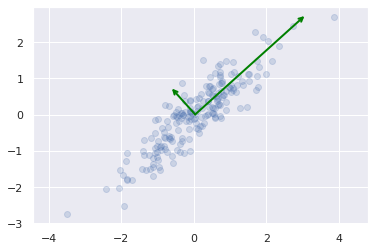

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='green')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal');

Estos vectores representan los *ejes principales* de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; de manera más precisa, es una medida de la variabilidad de los datos cuando se proyecta sobre ese eje.
La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.

Si graficamos estos componentes principales junto a los datos originales, vemos los gráficos que se muestran aquí:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)

Esta transformación de ejes de datos a ejes principales es una *transformación afín*, lo que básicamente significa que se compone de un traslado, rotación y escala de los datos.

Si bien este algoritmo para encontrar componentes principales puede parecer solo una curiosidad matemática, resulta tener aplicaciones de gran alcance en el mundo del aprendizaje automático y la exploración de datos.

### PCA para reducción de dimensiones

El uso de PCA para la reducción de dimensionalidad implica poner a cero uno o más de los componentes principales más pequeños, lo que da como resultado una proyección de menor dimensión de los datos que conserva la varianza máxima de los datos.

Aquí hay un ejemplo del uso de PCA como una transformación de reducción de dimensionalidad:

In [13]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Los datos transformados se han reducido a una sola dimensión.


Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y trazarlos junto con los datos originales.:

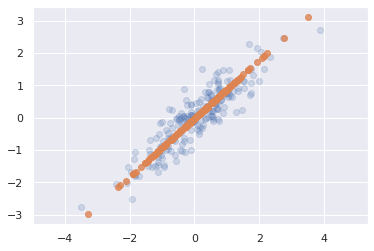

In [14]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos claros son los datos originales, mientras que los puntos oscuros son la versión proyectada.
Esto deja en claro lo que significa una reducción de dimensionalidad de PCA: se elimina la información a lo largo del eje o ejes principales menos importantes, dejando solo el componente o componentes de los datos con la mayor varianza.
La fracción de varianza que se corta (proporcional a la extensión de puntos alrededor de la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida es, en algunos sentidos, "suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50%, la relación general entre los puntos de datos se conserva en su mayoría.

### PCA para visualización: MNIST

La utilidad de la reducción de dimensionalidad puede no ser del todo evidente en solo dos dimensiones, pero se vuelve mucho más clara cuando se observan datos de alta dimensión.
Para ver esto, echemos un vistazo rápido a la aplicación de PCA a los dígitos que vimos en clases anteriores.

Empezamos cargando los datos:

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Los datos constan de imágenes (en este caso) de 8 × 8 píxeles, lo que significa que son de 64 dimensiones.

Para ganar algo de intuición sobre las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos:

In [16]:
pca = PCA(2)  # Proyectamos 64 dimensiones en 2. Es decir, reducimos por 62 el número de columnas
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Ahora podemos graficar los dos primeros componentes principales de cada punto para conocer los datos:

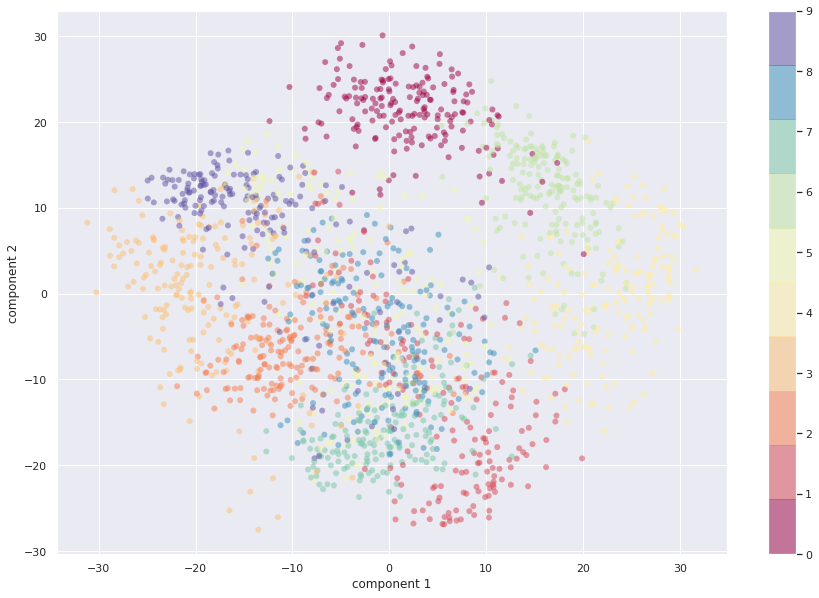

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recuerde lo que significan estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con la mayor varianza.
Básicamente, hemos encontrado el estiramiento y la rotación óptimos en un espacio de 64 dimensiones que nos permite ver el diseño de los dígitos en dos dimensiones, y lo hemos hecho sin supervisión, es decir, sin referencia a las etiquetas.

### Que significan los componentes?

Podemos ir un poco más allá y empezar a preguntarnos qué significan las dimensiones reducidas *.
Este significado puede entenderse en términos de combinaciones de vectores básicos.
Por ejemplo, cada imagen en el conjunto de entrenamiento está definida por una colección de valores de 64 píxeles, que llamaremos vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Una forma en que podemos pensar en esto es en términos de píxeles.
Es decir, para construir la imagen, multiplicamos cada elemento del vector por el píxel que describe, y luego sumamos los resultados para construir la imagen:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Una forma en la que podríamos imaginar la reducción de la dimensión de estos datos es poner a cero todos estos vectores básicos, excepto algunos.
Por ejemplo, si usamos solo los primeros ocho píxeles, obtenemos una proyección de ocho dimensiones de los datos, pero no refleja mucho la imagen completa: ¡hemos descartado casi el 90% de los píxeles!


![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)

La fila superior de paneles muestra los píxeles individuales y la fila inferior muestra la contribución acumulada de estos píxeles a la construcción de la imagen.
Usando solo ocho de los componentes basados ​​en píxeles, solo podemos construir una pequeña porción de la imagen de 64 píxeles.
Si continuáramos esta secuencia y usáramos los 64 píxeles, recuperaríamos la imagen original.

Pero la representación de píxeles no es la única opción de base. También podemos usar otras funciones de base, cada una de las cuales contiene una contribución predefinida de cada píxel, y escribir algo como

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

Se puede pensar en PCA como un proceso de elección de funciones de base óptimas, de modo que sumar solo las primeras de ellas sea suficiente para reconstruir adecuadamente la mayor parte de los elementos en el conjunto de datos.
Los componentes principales, que actúan como la representación de baja dimensión de nuestros datos, son simplemente los coeficientes que multiplican cada uno de los elementos de esta serie.
Esta figura muestra una descripción similar de la reconstrucción de este dígito usando la media más las primeras ocho funciones básicas de PCA:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)

A diferencia de la base de píxeles, la base PCA nos permite recuperar las características sobresalientes de la imagen de entrada con solo una media más ocho componentes.
La cantidad de cada píxel en cada componente es el corolario de la orientación del vector en nuestro ejemplo bidimensional.
Este es el sentido en el que PCA proporciona una representación de baja dimensión de los datos: descubre un conjunto de funciones básicas que son más eficientes que la base de píxeles nativa de los datos de entrada.

### Como escoger el número adecuado de componentes

Una parte vital del uso de PCA en la práctica es la capacidad de estimar cuántos componentes se necesitan para describir los datos.
Esto se puede determinar observando la relación de varianza explicada * acumulada * en función del número de componentes:

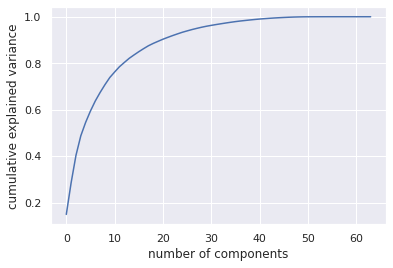

In [18]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Esta curva cuantifica qué parte de la varianza total de 64 dimensiones está contenida dentro de los primeros componentes de $N$.
Por ejemplo, vemos que con los dígitos, los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que se necesitan alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (medida por la varianza explicada) y que necesitaríamos alrededor de 20 componentes para retener el 90% de la varianza. Mirar esta gráfica para un conjunto de datos de alta dimensión puede ayudarlo a comprender el nivel de redundancia presente en múltiples observaciones.

## PCA para filtrar ruido

El PCA también se puede utilizar como método de filtrado para datos ruidosos.
La idea es la siguiente: cualquier componente con una variación mucho mayor que el efecto del ruido no debería verse relativamente afectado por el ruido.
Por lo tanto, si reconstruye los datos utilizando solo el subconjunto más grande de componentes principales, preferiblemente debe mantener la señal y eliminar el ruido.

Veamos cómo se ve esto con los datos de dígitos.
Primero trazaremos varios de los datos de entrada libres de ruido:

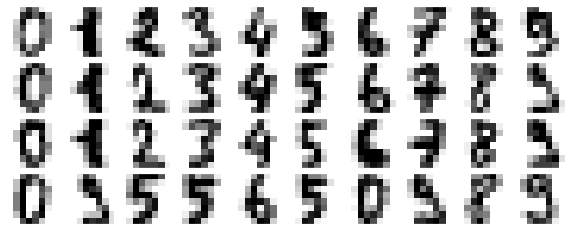

In [19]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora agreguemos algo de ruido aleatorio para crear un conjunto de datos ruidoso y volvamos a graficar:

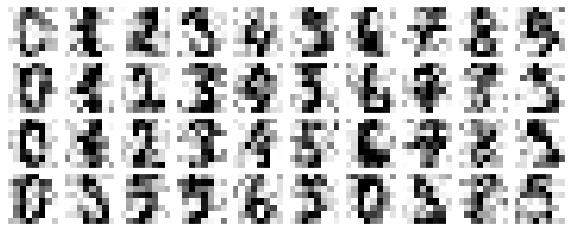

In [20]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Es evidente a simple vista que las imágenes contienen ruido y píxeles borrosos.
Entrenemos a un PCA en los datos ruidosos, solicitando que la proyección conserve el 50% de la varianza:

In [21]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Aquí el 50% de la varianza equivale a 12 componentes principales.
Ahora calculamos estos componentes y luego usamos la inversa de la transformación para reconstruir los dígitos filtrados:

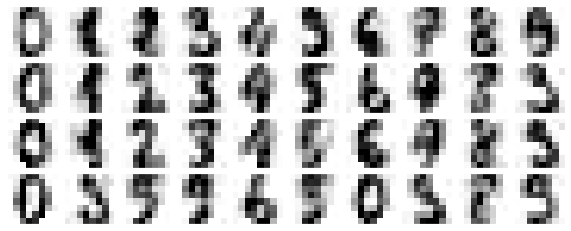

In [22]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de preservación de señal / filtrado de ruido hace que PCA sea una rutina de selección de características muy útil; por ejemplo, en lugar de entrenar un clasificador en datos de muy alta dimensión, puede entrenar el clasificador en la representación de dimensiones inferiores, que automáticamente servirá para filtrar salida de ruido aleatorio en las entradas.

## Principal Component Analysis Summary

En esta sección hemos discutido el uso del análisis de componentes principales para la reducción de dimensionalidad, visualización de datos de alta dimensión, filtrado de ruido y selección de características dentro de datos de alta dimensión.
Debido a la versatilidad e interpretabilidad de la PCA, se ha demostrado que es eficaz en una amplia variedad de contextos y disciplinas.
Dado cualquier conjunto de datos de alta dimensión, tiendo a comenzar con PCA para visualizar la relación entre puntos (como hicimos con los dígitos), para comprender la varianza principal en los datos (como hicimos con las caras propias) y para comprender la dimensionalidad intrínseca (trazando la razón de varianza explicada).
Ciertamente, PCA no es útil para todos los conjuntos de datos de alta dimensión, pero ofrece un camino sencillo y eficiente para obtener información sobre los datos de alta dimensión.

La principal debilidad de PCA es que tiende a verse muy afectada por valores atípicos en los datos.
Por esta razón, se han desarrollado muchas variantes robustas de PCA, muchas de las cuales actúan para descartar iterativamente puntos de datos que están mal descritos por los componentes iniciales.
Scikit-Learn contiene un par de variantes interesantes en PCA, que incluyen `` RandomizedPCA '' y `` SparsePCA '', ambos también en el submódulo `` sklearn.decomposition ''.
`` RandomizedPCA '', que vimos anteriormente, utiliza un método no determinista para aproximar rápidamente los primeros componentes principales en datos de muy alta dimensión, mientras que `` SparsePCA '' introduce un término de regularización que sirve para hacer cumplir la dispersión de los componentes.

In [23]:
from sklearn.datasets import fetch_california_housing

In [24]:
housing_dict = fetch_california_housing()

In [25]:
X = housing_dict["data"]
y = housing_dict["target"]

In [26]:
pca = PCA(n_components=2).fit(X)
pca.n_components_

2

In [27]:
from sklearn.linear_model import Lasso

In [28]:
pca_target = pca.transform(X)

In [30]:
lasso_reg = Lasso(alpha =.85).fit(X, pca_target)
lasso_reg.coef_

NameError: ignored